# AI ODYSSEY: LSTM ASSIGNMENT

This assignment is aimed at implementing LSTMs that we had learnt in class. In this task, we'll implement a model that takes text data as input and returns the emotion behind the text.

## TEXT PRE-PROCESSING FOR NLP

**Import the dataset.**

In [ ]:
#ENTER YOUR CODE HERE
import pandas as pd
import numpy as np
import matplotlib as plt

In [ ]:
data=pd.read_csv('/content/new_dataset.csv')
data


,sentiment,text
0,Negative,@xnausikaax oh no! where did u order from? tha...
1,Negative,A great hard training weekend is over. a coup...
2,Negative,"Right, off to work Only 5 hours to go until I..."
3,Negative,I am craving for japanese food
4,Negative,Jean Michel Jarre concert tomorrow gotta work...
...,...,...
9995,Positive,@krystynchong Love to see that!
9996,Positive,Lovely day spent with the misses. Just loverly
9997,Positive,@jason_mraz i love the fact that people are es...
9998,Positive,time to shower and tidy then going to go out f...


**The dataset clearly has a large no. of redundant words, because that is simply how we humans talk. We'll first remove the stopwords.**


In [ ]:
#ENTER YOUR CODE HERE
!pip install nltk




In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


data=data


stop_words = set(stopwords.words('english'))


def remove_stopwords(sentence):
    words = word_tokenize(sentence)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)


for i in range(len(data)):
    data['text'][i] = remove_stopwords(data['text'][i])


print(data)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     sentiment                                               text
0     Negative            @ xnausikaax oh ! u order ? 's horrible
1     Negative  great hard training weekend . couple days rest...
2     Negative                 Right , work 5 hours go 'm free xD
3     Negative                              craving japanese food
4     Negative  Jean Michel Jarre concert tomorrow got ta work...
...        ...                                                ...
9995  Positive                          @ krystynchong Love see !
9996  Positive                  Lovely day spent misses . loverly
9997  Positive  @ jason_mraz love fact people essentially good...
9998  Positive  time shower tidy going go lunch friend lake si...
9999  Positive                 @ martyndarkly 's excuse get Wii .

[10000 rows x 2 columns]


**Next, we'll remove some other info we dont need right now, like the handle names.**

In [ ]:
#ENTER YOUR CODE HERE
!pip install regex

In [ ]:

import re

def remove_handles_and_symbols(sentence):
    sentence = re.sub(r'@\w+', '', sentence)
    sentence = re.sub(r'[!?.,;:\'s]', '', sentence)
    return sentence

data['text'] = data['text'].apply(remove_handles_and_symbols)

print("After removing handles:")
print(data)



After removing handles:
     sentiment                                               text
0     Negative                 @ xnauikaax oh  u order   horrible
1     Negative  great hard training weekend  couple day ret le...
2     Negative                    Right  work 5 hour go m free xD
3     Negative                               craving japanee food
4     Negative  Jean Michel Jarre concert tomorrow got ta work...
...        ...                                                ...
9995  Positive                             @ krytynchong Love ee 
9996  Positive                       Lovely day pent mie  loverly
9997  Positive  @ jaon_mraz love fact people eentially good ma...
9998  Positive  time hower tidy going go lunch friend lake ide...
9999  Positive                     @ martyndarkly  excue get Wii 

[10000 rows x 2 columns]


**Now, we'll perform stemming, wherein we'll reduce the words to their root form.**

In [ ]:
#ENTER YOUR CODE HERE

In [ ]:


from nltk.stem import PorterStemmer

def stem_sentence(sentence):
    ps = PorterStemmer()
    words = word_tokenize(sentence)
    stemmed_words = [ps.stem(word) for word in words]
    return ' '.join(stemmed_words)

data['text'] = data['text'].apply(stem_sentence)

print("After stemming:")
print(data)


After stemming:
     sentiment                                               text
0     Negative                     @ xnauikaax oh u order horribl
1     Negative  great hard train weekend coupl day ret let lot...
2     Negative                     right work 5 hour go m free xd
3     Negative                                  crave japane food
4     Negative  jean michel jarr concert tomorrow got ta work ...
...        ...                                                ...
9995  Positive                              @ krytynchong love ee
9996  Positive                          love day pent mie loverli
9997  Positive  @ jaon_mraz love fact peopl eential good may w...
9998  Positive  time hower tidi go go lunch friend lake ide ho...
9999  Positive                        @ martyndarkli excu get wii

[10000 rows x 2 columns]


**Now that we are done with pre-processing, lets see what the gist of the data is that our model should capture.**
**Generate a word-cloud for the positive and negative words of the dataset.**

In [ ]:
#ENTER YOUR CODE HERE

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


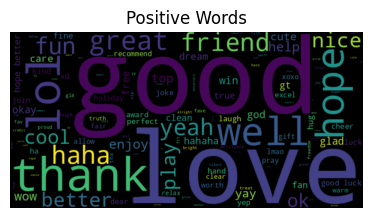

In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
sid = SentimentIntensityAnalyzer()


def classify_words(text):
    words = word_tokenize(text)
    pos_words = []
    neg_words = []
    for word in words:
        if sid.polarity_scores(word)['compound'] >= 0.1:
            pos_words.append(word)
        elif sid.polarity_scores(word)['compound'] <= -0.1:
            neg_words.append(word)
    return pos_words, neg_words


data['pos_words'], data['neg_words'] = zip(*data['text'].apply(classify_words))

all_pos_words = ' '.join([' '.join(words) for words in data['pos_words']])
all_neg_words = ' '.join([' '.join(words) for words in data['neg_words']])


pos_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_pos_words)
neg_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_neg_words)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.title('Positive Words')
plt.axis('off')

plt.show()

In [ ]:
#ENTER YOUR CODE HERE

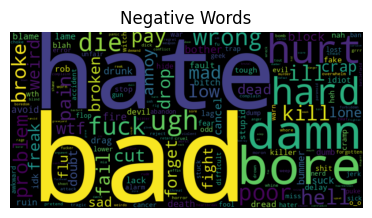

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.title('Negative Words')
plt.axis('off')
plt.show()

**I'd like to point out that 'Work' is bigger in the negative words display than it is in the positive words one.**

## TRAINING

**We have now processed the data for training. It's time for us to split it into training and test splits.**

In [ ]:
#ENTER YOUR CODE HERE
data

,sentiment,text,pos_words,neg_words
0,Negative,@ xnauikaax oh u order horribl,[],[]
1,Negative,great hard train weekend coupl day ret let lot...,[great],[hard]
2,Negative,right work 5 hour go m free xd,"[free, xd]",[]
3,Negative,crave japane food,[],[]
4,Negative,jean michel jarr concert tomorrow got ta work ...,[],[]
...,...,...,...,...
9995,Positive,@ krytynchong love ee,[love],[]
9996,Positive,love day pent mie loverli,[love],[]
9997,Positive,@ jaon_mraz love fact peopl eential good may w...,"[love, good, haha]",[wrong]
9998,Positive,time hower tidi go go lunch friend lake ide ho...,"[friend, hope, fun]",[]


In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['sentiment'], test_size=0.2, random_state=42)



**It is now time to convert our text sequences into numbers like the model will understand. Fit a tokenizer on the training dataset for the same. Let the vocab size be the no of unique words itself.**

In [ ]:
#ENTER YOUR CODE HERE

In [ ]:
!pip install keras
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


word_index = tokenizer.word_index

print("\nWord Index (Vocabulary):")
print(word_index)

print("\nTraining sequences:")
print(X_train_seq)

print("\nTest sequences:")
print(X_test_seq)



Word Index (Vocabulary):
{'nt': 1, 'go': 2, 'm': 3, 'get': 4, 'day': 5, 'work': 6, 'like': 7, 'good': 8, 'love': 9, 'u': 10, 'http': 11, 'time': 12, 'quot': 13, 'got': 14, 'today': 15, 'one': 16, 'know': 17, 'lol': 18, 'thank': 19, 'new': 20, 'think': 21, 'back': 22, 'feel': 23, 'im': 24, 'want': 25, 'mi': 26, 'ee': 27, 'hope': 28, 'realli': 29, 'amp': 30, 'ca': 31, 'need': 32, 'night': 33, 'na': 34, '2': 35, 'watch': 36, 'well': 37, 'll': 38, 'look': 39, 'till': 40, 'come': 41, 'oh': 42, 'make': 43, 'much': 44, 'home': 45, 're': 46, 'twitter': 47, 'lat': 48, 'morn': 49, 'great': 50, 'tomorrow': 51, 'wait': 52, 'haha': 53, 'leep': 54, '3': 55, 'take': 56, 'would': 57, 'ad': 58, 'follow': 59, 'friend': 60, 'right': 61, 'tri': 62, 'happi': 63, 'could': 64, 'week': 65, 'bad': 66, 'lot': 67, 'way': 68, 'even': 69, 'fun': 70, 'tonight': 71, 'peopl': 72, 'tweet': 73, 'better': 74, 'gon': 75, 'thing': 76, 'yeah': 77, 've': 78, 'wih': 79, 'hate': 80, 'hour': 81, 'next': 82, 'weekend': 83, 'be

**Now transform the training and testing word sequences.**

In [ ]:
#ENTER YOUR CODE HERE

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer=word_tokenize)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print(vectorizer.vocabulary_)


print(X_train_vec.toarray())
print(X_test_vec.toarray())

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


{'@': 820, 'akyno': 1150, '-': 12, 'need': 9211, 'it': 6857, 'one': 9667, 'day': 3798, 'drink': 4263, 'convo': 3379, 'tweeter': 12624, 'bit': 2125, 'annoy': 1427, 'tri': 12488, 'worri': 13621, 'mani': 8346, 'peopl': 10074, 'time': 12228, 'nt': 9459, 'good': 5639, 'month': 8913, 'alot': 1233, '_raymond': 849, 'go': 5599, 'tream': 12459, 'live': 8016, 'via': 13095, 'bb': 1899, 'storm': 11632, 'internet': 6785, 'cooper': 3395, 'nice': 9281, 'goket': 5621, 'particularli': 9971, 'kewl': 7475, 'ici': 6535, 'oh': 9576, 'still': 11619, 'wihe': 13475, 'danni': 3738, 'twitter': 12658, 'along': 1232, 'thank': 12016, 'forget': 5196, 'laundri': 7771, 'm': 8228, 'pedicur': 10042, 'chair': 2892, 'pa': 9865, 'get': 5502, 'manicur': 8348, 'chilaxin': 3005, 'ahelyleann': 1077, 'aweom': 1694, 'realli': 10830, 'great': 5717, 'glad': 5565, 'invit': 6812, '_arf_': 831, 'tire': 12245, 'hungov': 6451, 'lat': 7750, 'danc': 3710, 'cla': 3136, 'tonight': 12339, 'freed2travel': 5256, 'way': 13305, 'got': 5668, '*

**It is necessary for the simplicity of the model that each text sequence be of the same length. Pad the sequences to make this possible.**

In [ ]:
#ENTER YOUR CODE HERE

In [ ]:
maxlen = max(X_train_vec.shape[1], X_test_vec.shape[1])

def pad_sequences(mat, maxlen):
    padded_mat = np.zeros((mat.shape[0], maxlen), dtype=np.int32)
    for i in range(mat.shape[0]):
        row_length = min(mat.shape[1], maxlen)
        padded_mat[i, :row_length] = mat[i, :row_length]
    return padded_mat


X_train_padded = pad_sequences(X_train_vec.toarray(), maxlen)
X_test_padded = pad_sequences(X_test_vec.toarray(), maxlen)

print(X_train_padded)
print(X_test_padded)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**Label encode y.**

In [ ]:
#ENTER YOUR CODE HERE

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
print("\nLabel Encoded Training Labels:")
print(y_train_encoded)
print("\nLabel Encoded Test Labels:")
print(y_test_encoded)
vocab_size = len(vectorizer.vocabulary_)


Label Encoded Training Labels:
[1 0 0 ... 1 0 1]

Label Encoded Test Labels:
[1 0 0 ... 1 0 1]


**FOLLOWING CODE IS FOR CREATING WORD EMBEDDINGS. DON'T TOUCH IT.JUST REPLACE VOCAB_SIZE WITH THE VOCABULARY SIZE OBTAINED EARLIER.**

In [ ]:
import tensorflow as tf
import numpy as np
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2024-06-26 09:01:24--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-06-26 09:01:24--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-06-26 09:01:25--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.2’

gl

In [ ]:
GLOVE_EMB = '/content/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = '.../content/best_model.hdf5'
embeddings_index = {}
f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' %len(embeddings_index))
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector
embedding_layer = tf.keras.layers.Embedding(vocab_size,EMBEDDING_DIM,weights=[embedding_matrix],input_length=maxlen,trainable=False)


![Sequence Model](https://miro.medium.com/max/1458/1*SICYykT7ybua1gVJDNlajw.png)

**You should read up on why we added the previou code block.The embedding layer created is to be used in the model. Use the model summary to build the rest. Compile the model with Adam and a suitable loss function.**

In [ ]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
sequence_input = Input(shape=(maxlen), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
#ENTER YOUR CODE HERE

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
embedding_dim = 16

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=maxlen),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


print(model.summary())

**Train the model on the train split, and validate it on the test split.**

In [ ]:
#ENTER YOUR CODE HERE

In [ ]:

history = model.fit(X_train_padded, y_train_encoded, epochs=10, batch_size=4, validation_data=(X_test_padded, y_test_encoded))


loss, accuracy = model.evaluate(X_test_padded, y_test_encoded)



**Let's visualise the model's training history now.**

In [ ]:
#ENTER YOUR CODE HERE

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#ENTER YOUR CODE HERE

**Lets see what the accuracy of the model is.**

In [ ]:
#ENTER YOUR CODE HERE

In [ ]:
loss, accuracy = model.evaluate(X_test_padded, y_test_encoded)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


**Take a random input sequence from the text series. First predict on it nd gets its sentiment. Then decode the string using the tokenizer, etc. you've developed and print the string as well.**

In [ ]:
#ENTER YOUR CODE HERE

In [ ]:
#ENTER YOUR CODE HERE

**We can try this on a random string as well.**

In [ ]:
input_str="I hate everyone on earth!"
#ENTER YOUR CODE HERE

## GOOD JOB!